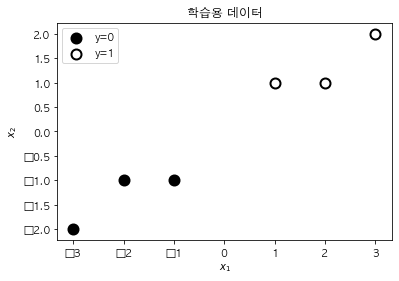

In [1]:
# 분류모형
# [1]https://datascienceschool.net/view-notebook/e2790743099742a396cfa4955ffc8a1f/
# 1. 확률적 모형
#    : 주어진 데이터(x)가 클래스(y)에 속할 조건부확률(P(y|x))을 계산하여 분류 
#    1) 확률적 판별(prbabilistic discriminative model)
#       : 조건부 확률함수의 모양을 직접 추정
#       : Logistic Regression, Decision Tree
#    2) 확률적 생성(probablistic generative model)
#       : 베이즈 정리를 사용하여 간접적으로 조건부 확률함수 추정
#       : LDA, QDA, Naive Baysian
# 2. 판별함수 모형(discriminant function)
#    : 주어진 데이터를 서로 다른 영역으로 나누는 경계면(decision boundary)을 찾아 분류함
#    : Perceptron, Support Vector Machine, Neural Netowork

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from matplotlib import rc
import warnings
warnings.filterwarnings(action="ignore")
rc('font', family="AppleGothic")
%matplotlib inline

### 확률적 생성 모델: Quadratic Discriminant Analysis(QDA)
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y = np.array([0,0,0,1,1,1])
plt.scatter(X[:3,0],X[:3,1], c="k", s=100, edgecolor="k", linewidth=2, label="y=0")
plt.scatter(X[3:,0],X[3:,1], c="w", s=100, edgecolor="k", linewidth=2, label="y=1")
plt.title("학습용 데이터")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()


In [2]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA().fit(X,y)

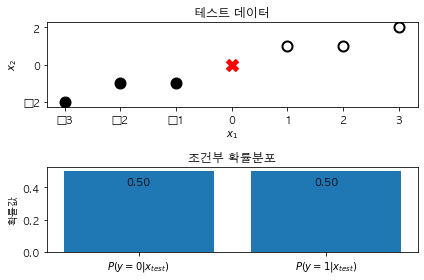

In [3]:
x = [[0,0]]
p = model.predict_proba(x)[0]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.scatter(X[:3,0], X[:3,1], c="k", s=100, edgecolor="k", linewidth=2, label="y=0")
ax1.scatter(X[3:,0], X[3:,1], c="w", s=100, edgecolor="k", linewidth=2, label="y=1")
ax1.scatter(x[0][0], x[0][1], c="r", s=100, edgecolor="k", marker='x', linewidth=5)
ax1.set_title("테스트 데이터")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")

ax2 = fig.add_subplot(212)
rects = ax2.bar(model.classes_, p)
ax2.set_title("조건부 확률분포")
ax2.set_xticks(model.classes_)
ax2.set_xticklabels(("$P(y=0|x_{test})$", "$P(y=1|x_{test})$"))
ax2.set_ylabel("확률값")
def autolabel(ax,rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 0.8*height, '{:.2f}'.format(height),
                ha='center', va='bottom')
autolabel(ax2,rects)    

plt.tight_layout()
plt.show()

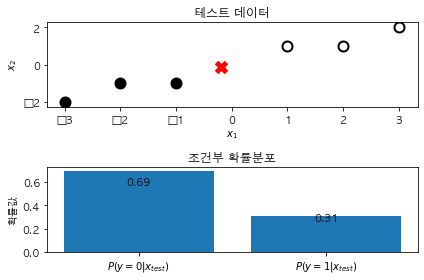

In [4]:
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.scatter(X[:3,0], X[:3,1], c="k", s=100, edgecolor="k", linewidth=2, label="y=0")
ax1.scatter(X[3:,0], X[3:,1], c="w", s=100, edgecolor="k", linewidth=2, label="y=1")
ax1.scatter(x[0][0], x[0][1], c="r", s=100, edgecolor="k", marker='x', linewidth=5)
ax1.set_title("테스트 데이터")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")

ax2 = fig.add_subplot(212)
rects = ax2.bar(model.classes_, p)
ax2.set_title("조건부 확률분포")
ax2.set_xticks(model.classes_)
ax2.set_xticklabels(("$P(y=0|x_{test})$", "$P(y=1|x_{test})$"))
ax2.set_ylabel("확률값")

def autolabel(ax,rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 0.8*height, '{:.2f}'.format(height),
                ha='center', va='bottom')
# [2] https://matplotlib.org/examples/api/barchart_demo.html
autolabel(ax2,rects)    

plt.tight_layout()
plt.show()

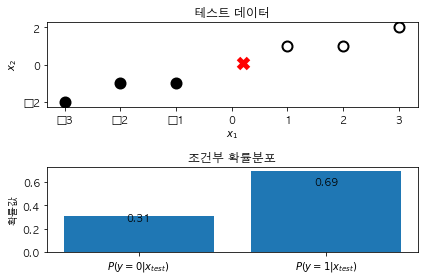

In [5]:
x = [[0.2, 0.1]]
p = model.predict_proba(x)[0]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.scatter(X[:3,0], X[:3,1], c="k", s=100, edgecolor="k", linewidth=2, label="y=0")
ax1.scatter(X[3:,0], X[3:,1], c="w", s=100, edgecolor="k", linewidth=2, label="y=1")
ax1.scatter(x[0][0], x[0][1], c="r", s=100, edgecolor="k", marker='x', linewidth=5)
ax1.set_title("테스트 데이터")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")

ax2 = fig.add_subplot(212)
rects = ax2.bar(model.classes_, p)
ax2.set_title("조건부 확률분포")
ax2.set_xticks(model.classes_)
ax2.set_xticklabels(("$P(y=0|x_{test})$", "$P(y=1|x_{test})$"))
ax2.set_ylabel("확률값")

autolabel(ax2,rects)    

plt.tight_layout()
plt.show()

In [6]:
### 확률적 생성 모델: Naive Bayesian
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer  #Pre-processor
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
news = fetch_20newsgroups(subset="all")
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words="english")),
    ('nb', MultinomialNB())
])
model.fit(news.data, news.target)

n = 1
x = news.data[n:n+1]
y = model.predict(x)[0]
print(x[0])
print("="*80)
print("실제 클래스: {}".format(news.target_names[news.target[n]]))
print("예측 클래스: {}".format(news.target_names[y]) )

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

실제 클래스: comp.sys.ibm.pc.hardware
예측 

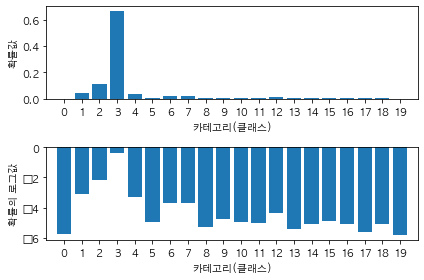

In [7]:
# conditional probability
plt.subplot(211)
plt.bar(model.classes_,model.predict_proba(x)[0])
plt.xlim(-1,20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")

plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xlim(-1,20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률의 로그값")

plt.tight_layout()
plt.show()

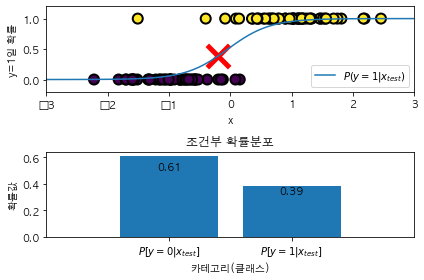

In [8]:
### 확률적 판별 모형: Logistic Regression model
# - 활성함수로 sigmoid 사용
# - sigmoid 함수의 리턴값이 입력한 데이터가 특정 클래스에 속할 확률
#[3] https://blog.naver.com/samsjang/220968297927 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1,
                            n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

x_test = [[-0.2]]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(xx, prob)
ax1.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
ax1.scatter(x_test[0], model.predict_proba(x_test)[0][1:], marker='x', s=500, c='r', lw=5)
ax1.set_xlim(-3,3)
ax1.set_ylim(-0.2,1.2)
ax1.set_xlabel("x")
ax1.set_ylabel("y=1일 확률")
ax1.legend(["$P(y=1|x_{test})$"])

ax2 = fig.add_subplot(212)
rects = ax2.bar(model.classes_, model.predict_proba(x_test)[0])
ax2.set_xlim(-1,2)
ax2.set_xticks(model.classes_)
ax2.set_xticklabels(["$P[y=0|x_{test}]$", "$P[y=1|x_{test}]$"])
ax2.set_title("조건부 확률분포")
ax2.set_xlabel("카테고리(클래스)")
ax2.set_ylabel("확률값")
autolabel(ax2,rects)
plt.tight_layout()
plt.show()


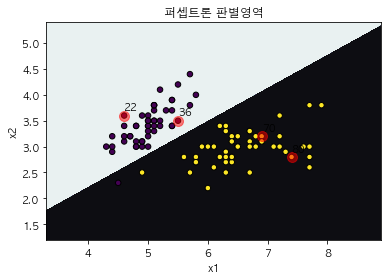

In [9]:
### 판별함수 모형: Perceptron
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min, XX_max = X[:,0].min()-1, X[:,0].max()+1
YY_min, YY_max = X[:,1].min()-1, X[:,1].max()+1
XX, YY = np.meshgrid(np.linspace(XX_min,XX_max,1000),
                     np.linspace(YY_min,YY_max,1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
#plt.contour(XX, YY, ZZ, colors='k')
plt.contourf(XX, YY, ZZ, cmap='bone_r')
plt.scatter(X[:,0], X[:,1], c=y, s=30, edgecolor='k', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx,0], X[idx,1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i,0], X[i,1]+0.1))
plt.grid(False)
plt.title("퍼셉트론 판별영역")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


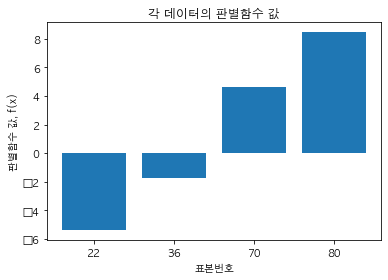

In [10]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("각 데이터의 판별함수 값")
plt.xlabel("표본번호")
plt.ylabel("판별함수 값, f(x)")
plt.show()

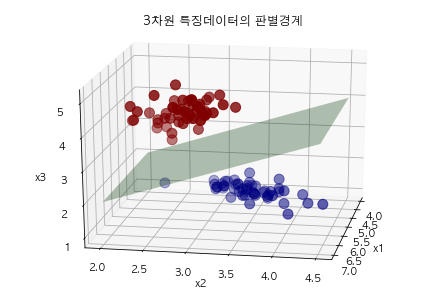

In [11]:
# iris data with 3 features
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target==0, iris.target==1)
X = iris.data[idx,:3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, marker='o', s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4,4], [7,7]]), 
                np.array([[2,4.5], [2,4.5]]),
                np.array([[2,4], [2,4]]), color='g', alpha=0.3)
ax.set_title("3차원 특징데이터의 판별경계")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
plt.show()


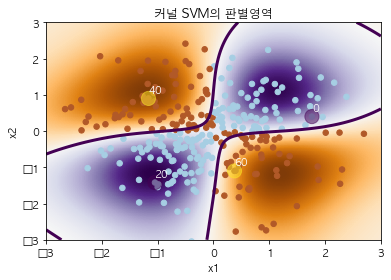

In [12]:
### 판별함수 모형: Support Vector Machine
# - 퍼셉트론은 분류 오류를 최소화, SVM은 마진을 최대화 [4]
# - 비선형 분류를 위해 커널함수 사용하여 input space 보다 고차원으로 mapping
# - Mapping된 공간의 차원에는 비례하지 않고, input space의 차원에만 비례함
# - min ||w||^2 + C*sum(zeta(i))_i=(1,N),   [5]
#   where C is regularization parameter that smaller C allows wider margin
#   and zeta is slack variable 
# [4] https://blog.naver.com/samsjang/220969601609
# [5] https://m.blog.naver.com/PostView.nhn?blogId=laonple&logNo=220845107089&proxyReferer=https%3A%2F%2Fwww.google.com%2F

from sklearn import svm
xx, yy = np.meshgrid(np.linspace(-3,3,500),
                     np.linspace(-3,3,500))
np.random.seed(0)
X = np.random.randn(300,2)
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)
model = svm.NuSVC().fit(X, Y)  # RBF kernel
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(),xx.max(),yy.min(),yy.max()),
           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:,0], X[:,1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx,0], X[idx,1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i,0],X[i,1]+0.15), color='white')
plt.grid(False)
plt.axis([-3,3, -3,3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("커널 SVM의 판별영역")
plt.show()

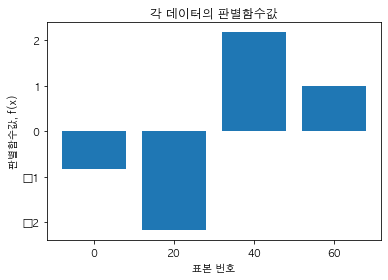

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
ax.bar(range(len(idx)), model.decision_function(X[idx]))
ax.set_xticks(range(len(idx)))
ax.set_xticklabels(idx)
ax.set_xlabel("표본 번호")
ax.set_ylabel("판별함수값, f(x)")
ax.set_title("각 데이터의 판별함수값")
plt.show()